# Regresi Linier

## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.diagnostic import acorr_ljungbox, het_white
from scipy.stats import kstest, shapiro

## Load dataset

In [2]:
data = pd.read_csv('delivery.csv')

In [3]:
data.shape

(25, 3)

In [4]:
data.head()

,n.prod,distance,delTime
0,7,560,16.68
1,3,220,11.50
2,3,340,12.03
3,4,80,14.88
4,6,150,13.75


# Visualisasi Data

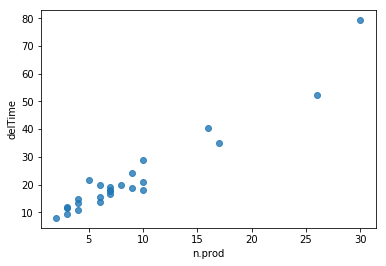

In [25]:
sns.regplot(x='n.prod', y='delTime', fit_reg=False, data=data)

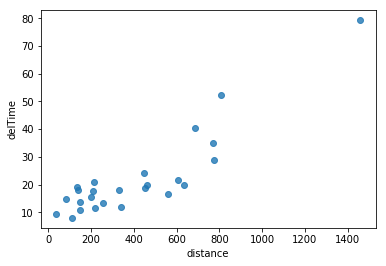

In [26]:
sns.regplot(x='distance', y='delTime', fit_reg=False, data=data)

# Koefisien Korelasi

In [7]:
data.corr()['delTime']

n.prod      0.964615
distance    0.891670
delTime     1.000000
Name: delTime, dtype: float64

## Model Linier Sederhana

In [8]:
data = add_constant(data)

c:\users\dewa.desktop-17tc7q5\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Model delTime vs n.prod

In [9]:
model_nprod = OLS(data['delTime'], data[['const', 'n.prod']])
result_nprod = model_nprod.fit()

In [10]:
print(result_nprod.summary())

                            OLS Regression Results                            
Dep. Variable:                delTime   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     307.8
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           8.22e-15
Time:                        15:56:23   Log-Likelihood:                -70.197
No. Observations:                  25   AIC:                             144.4
Df Residuals:                      23   BIC:                             146.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3208      1.371      2.422      0.0

### Model delTime vs distance

In [11]:
model_distance = OLS(data['delTime'], data[['const', 'distance']])
result_distance = model_distance.fit()

In [12]:
print(result_distance.summary())

                            OLS Regression Results                            
Dep. Variable:                delTime   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     89.24
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           2.21e-09
Time:                        15:56:31   Log-Likelihood:                -83.710
No. Observations:                  25   AIC:                             171.4
Df Residuals:                      23   BIC:                             173.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9612      2.337      2.123      0.0

## Model Regresi Linier Ganda (delTime vs n.prod, distance)

In [13]:
model_all = OLS(data['delTime'], data[['const', 'n.prod', 'distance']])
result_all = model_all.fit()

In [14]:
print(result_all.summary())

                            OLS Regression Results                            
Dep. Variable:                delTime   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     261.2
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           4.69e-16
Time:                        15:56:35   Log-Likelihood:                -63.415
No. Observations:                  25   AIC:                             132.8
Df Residuals:                      22   BIC:                             136.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3412      1.097      2.135      0.0

## Pemeriksaan Asumsi Residual

In [27]:
residual = result_all.resid

### Uji Independensi

In [16]:
chisq_stat, chisq_pval = acorr_ljungbox(residual)

In [17]:
print('statistik uji chi-square =', ['{0:.3f}'.format(val) for val in chisq_stat])
print('p-value =', ['{0:.3f}'.format(val) for val in chisq_pval])

statistik uji chi-square = ['3.666', '5.291', '5.296', '5.858', '6.229', '6.291', '6.326', '6.835', '6.838', '7.058']
p-value = ['0.056', '0.071', '0.151', '0.210', '0.285', '0.391', '0.502', '0.555', '0.654', '0.720']


### Uji Heteroskedastisitas

In [18]:
het_result = het_white(residual, data[['const', 'n.prod', 'distance']])

In [19]:
print('LM stat = {0:.3f}'.format(het_result[0]))
print('LM p-value = {0:.3f}'.format(het_result[1]))
print('F stat = {0:.3f}'.format(het_result[2]))
print('F p-value = {0:.3f}'.format(het_result[3]))

LM stat = 14.962
LM p-value = 0.011
F stat = 5.664
F p-value = 0.002


### Uji Normalitas

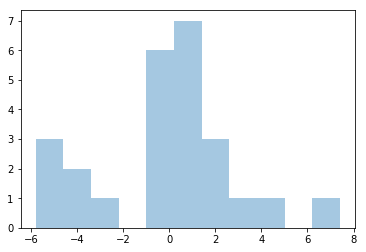

In [20]:
sns.distplot(residual, kde=False, norm_hist=False)

In [21]:
ks_result = kstest(residual, 'norm')
print('KS stat = {0:.3f}'.format(ks_result[0]))
print('KS p-value = {0:.3f}'.format(ks_result[1]))

KS stat = 0.248
KS p-value = 0.077


In [22]:
shapiro_result = shapiro(residual)
print('Shapiro stat = {0:.3f}'.format(shapiro_result[0]))
print('Shapiro p-value = {0:.3f}'.format(shapiro_result[1]))

Shapiro stat = 0.952
Shapiro p-value = 0.271
